In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig, AutoImageProcessor, AutoModelForVision2Seq, AutoProcessor, AutoModelForCausalLM
import torch

# import mani_skill.envs
# import gymnasium as gym
# from mani_skill.vector.wrappers.gymnasium import ManiSkillVectorEnv
# N = 9
# env = gym.make("PickCube-v1", num_envs=N, reconfiguration_freq=None)
# env = ManiSkillVectorEnv(env, num_envs=N, ignore_terminations=False, auto_reset=True, record_metrics=True)
# env.action_space # shape (N, D)
# env.single_action_space # shape (D, )
# env.observation_space # shape (N, ...)
# env.single_observation_space # shape (...)
# obs, _ = env.reset()
# obs, rew, terminated, truncated, info = env.step(env.action_space.sample())
# # obs (N, ...), rew (N, ), terminated (N, ), truncated (N, )



local_path = "/mnt/nfs_68/caozhe/workspace/vlav-project/maniskill_stack_cubes_dual/internvl2-2b/v0-20250729-171130/checkpoint-640"
torch_dtype = torch.bfloat16
actor_model_config = AutoConfig.from_pretrained(local_path, trust_remote_code=True)

# model = AutoModelForCausalLM.from_pretrained(
#     pretrained_model_name_or_path=local_path,
#     torch_dtype=torch_dtype,
#     config=actor_model_config,
#     trust_remote_code=True,
# ).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(local_path, trust_remote_code=True, use_fast=False)
# img_context_token_id = tokenizer.convert_tokens_to_ids('<IMG_CONTEXT>',)
# # processor = AutoProcessor.from_pretrained(local_path, trust_remote_code=True)
# print(img_context_token_id)

import json

def read_jsonl_standard(file_path: str) -> list:
    """
    使用 Python 标准库逐行读取 JSONL 文件。
    
    :param file_path: JSONL 文件的路径。
    :return: 一个包含所有解析后的JSON对象（字典）的列表。
    """
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                # 移除行尾可能存在的空白字符（包括换行符）
                clean_line = line.strip()
                if clean_line:  # 确保不是空行
                    # 解析当前行
                    data.append(json.loads(clean_line))
    except FileNotFoundError:
        print(f"错误：文件未找到于 '{file_path}'")
    except json.JSONDecodeError as e:
        print(f"错误：文件 '{file_path}' 中存在JSON解析错误: {e}")
    
    return data

data = read_jsonl_standard("deltaQ_backbone/inference_log.jsonl")
for data_dict in data:
    response = data_dict['response']
    query = data_dict['question']
    # num tokens of the response
    num_tokens = len(tokenizer.encode(response))
    print(f"Response: {response}, Num Tokens: {num_tokens}")
    num_tokens = len(tokenizer.encode(query))
    print(f"Query: {query}, Num Tokens: {num_tokens}")
    break

current_strings = [
    # '{', 
    # ' ', 
    # '{ ', 
    # '-', 
    # '2', 
    # '-4', 
    # '1', 
    # '3', 
    # '0', 
    # '-2', 
    # '3', 
    # '40', 
    # '}', 
    # "{2 -4 1 3 0 -2 -3}", 
    # "{2 -4 1 3 0 -2 -3}{2 -4 1 3 0 -2 -3}{2 -4 1 3 0 -2 -3}{2 -4 1 3 0 -2 -3}", 
    # "2 -4 1 3 0 -2 -3", 
    # "2 -4 1 3 0 -2 -3|", 
    # "2 -4 1 3 0 -2 -3| 2 -4 1 3 0 -2 -3|", 
    # "0 0 0 0 0 0 1|",
    # "0 -1 0 0 0 0 1| 6 13 3 -3 7 -19 1|",
    # "0 -1 0 0 0 0 1| 6 13 3 -3 7 -19 1| 6 14 3 -3 7 -20 1| 5 10 2 -3 5 -14 1| 3 6 1 -2 3 -9 1| 1 3 1 0 0 0 1| 0 0 0 0 0 0 1| 0 0 0 0 0 0 1|",
    "0 -1 0 0 0 0 1",
    "-3 -1 0 0 0 0 1",
    # "0 -1 0 0 0 0 1| 6 13 3 -3 7 -19 1|", 
    # "0 -1 0 0 0 0 1| 6 13 3 -3 7 -19 1| 6 14 3 -3 7 -20 1| 5 10 2 -3 5 -14 1| 3 6 1 -2 3 -9 1| 1 3 1 0 0 0 1| 0 0 0 0 0 0 1| 0 0 0 0 0 0 1|",
    # "-18 -35 -28 +8 -9 70 1|",
    # '+',
    # '-',
    # "-18 -35 -28 +8 -9 70 1| -30 -57 -44 13 -15 113 1|",
    # "-18 -35 -28 +8 -9 70 1| -30 -57 -44 13 -15 113 1| -42 -80 -62 19 -21 160 1|",
    # "-18 -35 -28 +8 -9 70 1| -30 -57 -44 13 -15 113 1| -42 -80 -62 19 -21 160 1| -56 -104 -80 24 -26 207 1| -70 -128 -99 30 -31 257 1| -86 -152 -117 36 -35 307 1| -104 -175 -137 42 -40 358 1| -123 -198 -156 48 -44 410 1|",
    # "2 -4 1 -3 0 -2 -3",
    # "2 -4 1 3 0 -2 -3 2 -4 1 3 0 -2 -3 2 -4 1 3 0 -2 -3 2 -4 1 3 0 -2 -3 2 -4 1 3 0 -2 -3"
]

for st_r in current_strings:
    tmp_response = st_r
    token = tokenizer.encode(tmp_response)
    num_tokens = len(token)
    print(f"Response: {tmp_response}\nNum Tokens: {num_tokens}\nToken: {token}\n--------------------------------")
    # 1) 拆成 token 字符串
    toks = tokenizer.tokenize(st_r)
    # 2) 编成 id
    ids  = tokenizer.convert_tokens_to_ids(toks)
    print(f"原始字符串：{st_r}")
    for tok, idx in zip(toks, ids):
        print(f"  Token: |{tok}|   →   ID: |{idx}|")
    print()
# tmp_response = "2, 4, 1, 3, 0, -2, 3, 40"
# num_tokens = len(tokenizer.encode(tmp_response))
# print(f"Response: {tmp_response}, Num Tokens: {num_tokens}")

# tmp_response = "2 4 1 3 0 -2 3 40"
# num_tokens = len(tokenizer.encode(tmp_response))
# print(f"Response: {tmp_response}, Num Tokens: {num_tokens}")

# tmp_response = "{2 -4 1 3 0 -2 -3}"
# num_tokens = len(tokenizer.encode(tmp_response))
# print(f"Response: {tmp_response}, Num Tokens: {num_tokens}")

# response = ''
# for i in range(3):
#     response = tmp_response
#     print(f"Num Tokens: {len(tokenizer.encode(response))}")

# tmp_response = "{2 -4 1 3 0 -2 -3}{2 -4 1 3 0 -2 -3}{2 -4 1 3 0 -2 -3}"
# num_tokens = len(tokenizer.encode(tmp_response))
# print(f"Response: {tmp_response}, Num Tokens: {num_tokens}")

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
local_path = "/mnt/nfs_68/caozhe/workspace/vlav-project/maniskill_stack_cubes_dual/internvl2-2b/v0-20250729-171130/checkpoint-640"

tokenizer = AutoTokenizer.from_pretrained(local_path)
model     = AutoModelForCausalLM.from_pretrained(local_path)

# 简单测试 prefix_allowed_tokens_fn
def dummy_fn(batch_id, input_ids):
    # 总是只允许 [0] 这个 token
    return [0]

input_ids = tokenizer("Hello", return_tensors="pt").input_ids
out = model.generate(
    input_ids,
    max_new_tokens=5,
    prefix_allowed_tokens_fn=dummy_fn,
    do_sample=False,
)
print(tokenizer.decode(out[0]))


In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig, AutoImageProcessor, AutoModelForVision2Seq, AutoProcessor, AutoModelForCausalLM
import torch

local_path = "/mnt/nfs_68/caozhe/workspace/vlav-project/maniskill_stack_cubes_dual/internvl2-2b/v0-20250729-171130/checkpoint-640"
torch_dtype = torch.bfloat16
actor_model_config = AutoConfig.from_pretrained(local_path, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(local_path, trust_remote_code=True, use_fast=False)

signs = [' +', ' -', '|', '{', '}']
numbers = list(range(0, 1000))

allow_list = []
for str_ in signs:
    toks = tokenizer.tokenize(str_)
    assert len(toks) == 1
    allow_list.append(tokenizer.convert_tokens_to_ids(toks)[0])
for str_ in numbers:
    toks = tokenizer.tokenize(str(str_))
    assert len(toks) == 1
    allow_list.append(tokenizer.convert_tokens_to_ids(toks)[0])

def action_allowed_fn(batch_id, input_ids):
    return allow_list

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
entity = tokenizer(" Bob Marley", return_tensors="pt").input_ids[0]  # 3 tokens
def prefix_allowed_tokens_fn(batch_id, input_ids):
    '''
    Attempts to generate 'Bob Marley' when 'Bob' is detected.
    In this case, `batch_id` is not used, but you can set rules for each batch member.
    '''
    if input_ids[-1] == entity[0]:
        return [entity[1].item()]
    elif input_ids[-2] == entity[0] and input_ids[-1] == entity[1]:
        return [entity[2].item()]
    return list(range(tokenizer.vocab_size))  # If no match, allow all tokens

In [ ]:
traj_len = 150
traj_batch = 30
traj_split_num = traj_len // traj_batch


for i in range(0, traj_len, int(traj_len / traj_split_num)):
    print(i)


: 

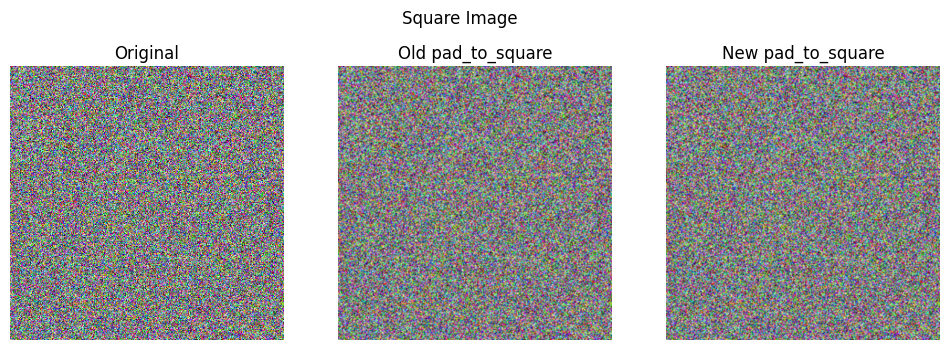

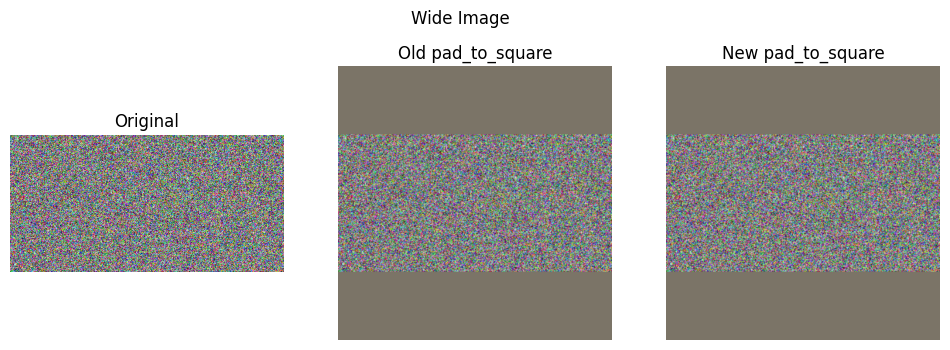

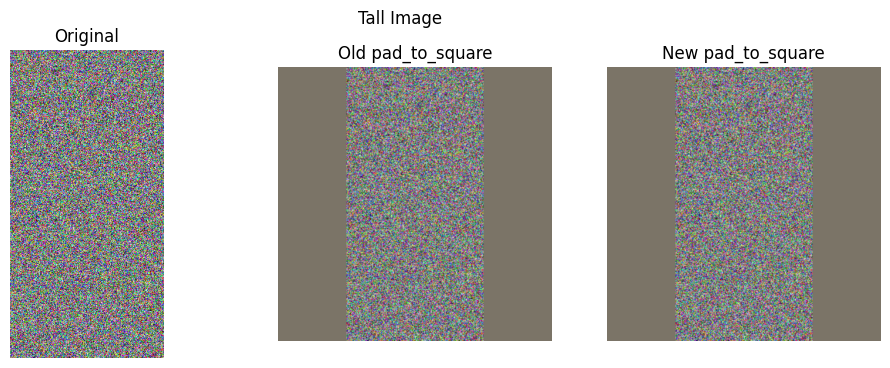

In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def old_pad_to_square(image, resize_target=(480, 480)):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    padding_value = np.array([103.53, 116.28, 123.675], dtype=np.uint8).tolist()    # bgr
    h, w, _ = image.shape
    if h > w:
        pad_h = 0
        pad_w = (h - w) // 2
    else:
        pad_w = 0
        pad_h = (w - h) // 2
    padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT, value=padding_value)
    resized_image = cv2.resize(padded_image, resize_target, interpolation=cv2.INTER_LINEAR)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)  # Convert back to RGB
    return resized_image

def new_pad_to_square(image: Image.Image, resize_target=(480, 480), padding_fill_value=(123, 116, 103)) -> Image.Image:
    w, h = image.size
    max_wh = max(w, h)
    horizontal_pad = (max_wh - w) // 2
    vertical_pad = (max_wh - h) // 2
    padding = (horizontal_pad, vertical_pad, max_wh - w - horizontal_pad, max_wh - h - vertical_pad)
    # PIL.ImageOps.expand is a simple alternative to torchvision.transforms.functional.pad
    from PIL import ImageOps
    padded_image = ImageOps.expand(image, border=padding, fill=padding_fill_value)
    resized_image = padded_image.resize(resize_target, Image.BILINEAR)
    return resized_image

def show_compare(img_np, old_result, new_result, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_np)
    plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(old_result)
    plt.title('Old pad_to_square')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(new_result)
    plt.title('New pad_to_square')
    plt.axis('off')
    plt.suptitle(title)
    plt.show()

def test_pad_to_square():
    # Example 1: RGB square image
    img1 = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)
    pil_img1 = Image.fromarray(img1)
    old1 = old_pad_to_square(img1)
    new1 = np.array(new_pad_to_square(pil_img1))
    show_compare(img1, old1, new1, "Square Image")

    # Example 2: Wide image
    img2 = np.random.randint(0, 255, (200, 400, 3), dtype=np.uint8)
    pil_img2 = Image.fromarray(img2)
    old2 = old_pad_to_square(img2)
    new2 = np.array(new_pad_to_square(pil_img2))
    show_compare(img2, old2, new2, "Wide Image")

    # Example 3: Tall image
    img3 = np.random.randint(0, 255, (400, 200, 3), dtype=np.uint8)
    pil_img3 = Image.fromarray(img3)
    old3 = old_pad_to_square(img3)
    new3 = np.array(new_pad_to_square(pil_img3))
    show_compare(img3, old3, new3, "Tall Image")

    # Example 4: Real image file (optional, if you have test.jpg)
    # img4 = cv2.imread('test.jpg')
    # img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    # pil_img4 = Image.fromarray(img4)
    # old4 = old_pad_to_square(img4)
    # new4 = np.array(new_pad_to_square(pil_img4))
    # show_compare(img4, old4, new4, "Real Image")

test_pad_to_square()